## Training for 25 epochs instead of 10 to increase performance

#  My Contribution – Fine-Tuning EfficientNet-B0 on CIFAR-10

This notebook represents the contribution phase of our project. After evaluating the pretrained EfficientNet-B0 model on CIFAR-10 in the previous notebook (`paper_implementation.ipynb`), we now fine-tune the model to improve its performance.

###  Training Strategy

We explored two options:
1. Freezing all feature extraction layers and training only the classifier.
2. Fine-tuning the entire model (our selected approach).

Fine-tuning all layers allows the model to learn CIFAR-10-specific features while still benefiting from pretrained ImageNet knowledge. Freezing can be done using:
```python
for param in model.features.parameters():
    param.requires_grad = False


In [ ]:
# Fine-tuning the model with logging and performance tracking

#  we discussed two options for training:
# 1. Freeze the feature extractor layers and train only the final classification layer.
# 2. Fine-tune the entire model including all layers.

# Freezing layers can reduce training time and retain pretrained knowledge,
# and we could’ve done that using:
# for param in model.features.parameters():
#     param.requires_grad = False

# However, we chose to fine-tune the whole network so it could better adapt to the CIFAR-10 dataset.
# This allowed the model to adjust its internal representations more effectively.
# We also considered experimenting with partial freezing for comparison, which can be a future extension.

model.train()  # set to training mode

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 25

train_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    partial_loss = 0.0
    steps_in_partial = 0

    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero out gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()
        partial_loss += loss.item()
        steps_in_partial += 1

        # Print partial logs every 250 mini-batches
        if (i + 1) % 250 == 0:
            avg_partial = partial_loss / steps_in_partial
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{i+1}/{len(train_loader)}], "
                  f"Partial Average Loss: {avg_partial:.4f}")
            # Reset partial counters
            partial_loss = 0.0
            steps_in_partial = 0

    # Average training loss over the entire epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluate on test set (note: pass 'device' to evaluate)
    test_acc = evaluate(model, test_loader, device)
    test_accuracies.append(test_acc)

    # Print epoch summary
    print(f"--- EPOCH {epoch+1} FINISHED ---\n"
          f"Avg Train Loss: {avg_train_loss:.4f}, Test Accuracy: {test_acc:.2f}%\n")


Epoch [1/25], Step [250/782], Partial Average Loss: 1.4923
Epoch [1/25], Step [500/782], Partial Average Loss: 1.0495
Epoch [1/25], Step [750/782], Partial Average Loss: 0.9167
--- EPOCH 1 FINISHED ---
Avg Train Loss: 1.1414, Test Accuracy: 73.82%

Epoch [2/25], Step [250/782], Partial Average Loss: 0.8112
Epoch [2/25], Step [500/782], Partial Average Loss: 0.7582
Epoch [2/25], Step [750/782], Partial Average Loss: 0.7329
--- EPOCH 2 FINISHED ---
Avg Train Loss: 0.7657, Test Accuracy: 77.93%

Epoch [3/25], Step [250/782], Partial Average Loss: 0.6792
Epoch [3/25], Step [500/782], Partial Average Loss: 0.6650
Epoch [3/25], Step [750/782], Partial Average Loss: 0.6632
--- EPOCH 3 FINISHED ---
Avg Train Loss: 0.6691, Test Accuracy: 80.74%

Epoch [4/25], Step [250/782], Partial Average Loss: 0.6181
Epoch [4/25], Step [500/782], Partial Average Loss: 0.5996
Epoch [4/25], Step [750/782], Partial Average Loss: 0.6092
--- EPOCH 4 FINISHED ---
Avg Train Loss: 0.6096, Test Accuracy: 82.69%

Epoc

Optimizer: Adam (lr = 0.001)

Loss Function: CrossEntropyLoss

Epochs: 25

Batch Size: 64

Metrics Tracked: Training loss and test accuracy after each epoch

We trained the model using the standard PyTorch training loop and evaluated accuracy on the test set after each epoch. Results were stored in lists and visualized using line plots

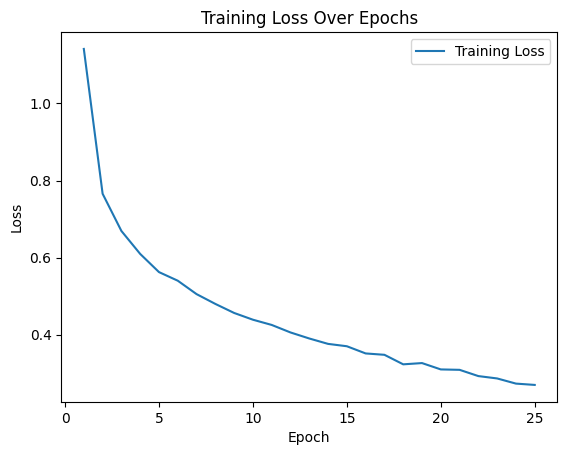

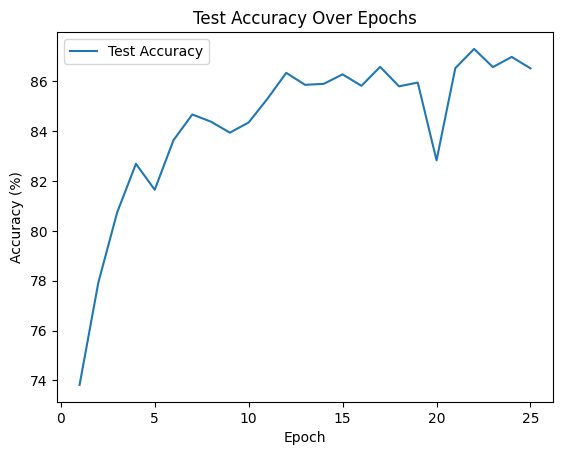

In [ ]:

#  Plot Training Loss and Test Accuracy

import matplotlib.pyplot as plt

# Plot Training Loss
plt.figure()
plt.plot(range(1, EPOCHS+1), train_losses, label="Training Loss")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Test Accuracy
plt.figure()
plt.plot(range(1, EPOCHS+1), test_accuracies, label="Test Accuracy")
plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.show()

After training:

We evaluated the model using the same evaluate() function from the implementation notebook.

We compared the model’s performance before and after fine-tuning.



In [ ]:

#  Evaluate Model AFTER Fine-Tuning

post_finetune_acc = evaluate(model, test_loader, device)
print(f"Accuracy of the fine-tuned model on CIFAR-10: {post_finetune_acc:.2f}%")


Accuracy of the fine-tuned model on CIFAR-10: 86.52%


In [ ]:

#  Compare Performance
print("--------------------------------------------------")
print(f"Pre-Fine-Tuning Accuracy:  {pre_finetune_acc:.2f}%")
print(f"Post-Fine-Tuning Accuracy: {post_finetune_acc:.2f}%")

--------------------------------------------------
Pre-Fine-Tuning Accuracy:  9.89%
Post-Fine-Tuning Accuracy: 86.52%


Our fine-tuning contribution significantly improved the model’s performance on CIFAR-10. The pretrained model alone was not sufficient for this dataset, but by allowing the network to adapt, we leveraged transfer learning to achieve high accuracy with limited data and compute.